# Rihal CodeStacker Challenge - Machine Learning

### Beylasan Al Ruzaiqi                                                                             - beylasanasseralr@outlook.com

##### GitHub Profile Link: https://github.com/BeylasanRuzaiqi

##### Challenge Solution Repo Link: https://github.com/BeylasanRuzaiqi/ML_CodeStacker

Importing Libraries

In [24]:
import nltk
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize

Loading Stopwords from the NLTK Library

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beyla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\beyla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Reading the dataset into a Pandas DataFrame

In [4]:
df = pd.read_json("C:\\Users\\beyla\\OneDrive\\Desktop\\jupyter\\RihalML\\N24News\\news\\nytimes_dataset.json")

Exploratory Data Analysis

In [5]:
print(df.head())

      section                                           headline  \
0      Health  F.D.A. Plans to Ban Most E-Cigarette Flavors b...   
1     Science  Meteor Showers in 2020 That Will Light Up Nigh...   
2     Science  Rocket Launches, Trips to Mars and More 2020 S...   
3  Television  What's on TV Wednesday: A Linda Ronstadt Doc a...   
4      Travel        New Cruise Ships to Set Sail for Antarctica   

                                            abstract  \
0  The tobacco and vaping industries and conserva...   
1  All year long, Earth passes through streams of...   
2  A year full of highs and lows in space just en...   
3  "Linda Ronstadt: The Sound of My Voice" airs o...   
4  Interested in the southernmost continent? Here...   

                                             caption  \
0  A new study by the National Institute on Drug ...   
1  Perseid meteors named as "Orinoid" streak acro...   
2  Spectators viewing the launch of a Soyuz rocke...   
3  Linda Ronstadt in "Linda Ro

In [6]:
print("Number of unique sections:",df['section'].nunique())
print("Number of articles:",df['article_url'].count())
print("Number of images in the dataset:",df['image_id'].count())

Number of unique sections: 24
Number of articles: 61218
Number of images in the dataset: 61218


In [7]:
print("Sections:",df['section'].value_counts())

Sections: section
Health             3000
Opinion            3000
Technology         3000
Fashion            3000
Food               3000
Media              3000
Art & Design       3000
Science            3000
Music              3000
Books              3000
Theater            3000
Sports             3000
Real Estate        3000
Dance              3000
Movies             3000
Travel             3000
Television         3000
Style              2681
Automobiles        1825
Economy            1761
Your Money         1263
Global Business    1182
Education           825
Well                681
Name: count, dtype: int64


In [8]:
df.describe()

,section,headline,abstract,caption,image_url,article_url,image_id
count,61218,61218,61218,61218,61218,61218,61218
unique,24,59581,60097,60203,60813,61217,61218
top,Health,Recent Commercial Real Estate Transactions,"Previews, openings and some last-chance picks.",,https://static01.nyt.com/images/2012/02/29/bus...,https://www.nytimes.com/2015/01/29/business/me...,42d25485-0e48-50bf-8d16-948833b2a55d
freq,3000,182,150,303,18,2,1


Visualization of Sections

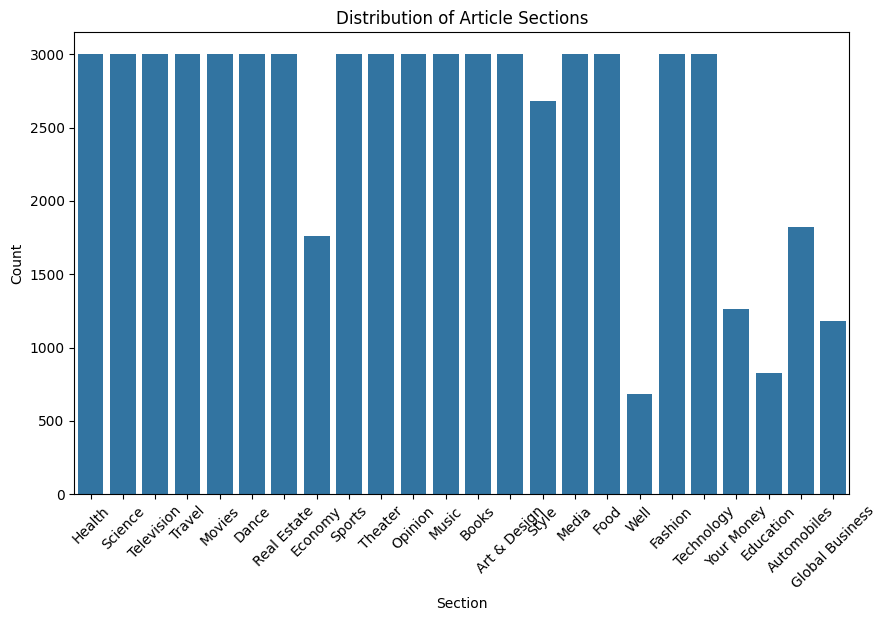

In [9]:
# Visualize distribution of article sections
plt.figure(figsize=(10, 6))
sns.countplot(x='section', data=df)
plt.title('Distribution of Article Sections')
plt.xlabel('Section')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Loading training and testing data and exploring

In [11]:
# Loading training data
with open("C:\\Users\\beyla\\OneDrive\\Desktop\\jupyter\\RihalML\\N24News\\news\\nytimes_train.json", "r") as train_file:
    train_data = json.load(train_file)

train_df = pd.DataFrame(train_data)

In [12]:
print(train_df.head())

        section                                           headline  \
0       Theater  Before 'Moonlight' and 'The Walking Dead,' a F...   
1    Television  What's on TV Wednesday: 'Crip Camp' and 'Dark ...   
2        Sports  Rays Stick to Their Plan and Reach a 2nd World...   
3  Art & Design    For Robert Rauschenberg, No Artist Is an Island   
4       Theater  Jimmy Buffett's 'Margaritaville' Musical Sets ...   

                                         article_url  \
0  https://www.nytimes.com/2017/02/21/theater/dan...   
1  https://www.nytimes.com/2020/03/25/arts/televi...   
2  https://www.nytimes.com/2020/10/17/sports/base...   
3  https://www.nytimes.com/2017/05/11/arts/design...   
4  https://www.nytimes.com/2017/06/05/theater/jim...   

                                             article  \
0  Danai Gurira and Andre Holland in a theater at...   
1  CRIP CAMP: A DISABILITY REVOLUTION (2020) Stre...   
2  The Tampa Bay Rays told Charlie Morton it woul...   
3  We tend to thin

In [13]:
# Loading testing data
with open("C:\\Users\\beyla\\OneDrive\\Desktop\\jupyter\\RihalML\\N24News\\news\\nytimes_test.json", "r") as test_file:
    test_data = json.load(test_file)

test_df = pd.DataFrame(test_data)

In [14]:
print(test_df.head())

       section                                           headline  \
0       Travel  Afropunk, Huichica and More: 8 Music Festivals...   
1        Style                  The Repurposing of a Vogue Editor   
2  Real Estate                           Sites for Aviation Buffs   
3   Television  What's on TV Monday: 'Amy Schumer Learns to Co...   
4      Economy  Argentina Raises Key Rate to 40%, Bringing Eco...   

                                         article_url  \
0  https://www.nytimes.com/2019/03/15/travel/afro...   
1  https://www.nytimes.com/2019/04/09/style/tonne...   
2  https://www.nytimes.com/2016/12/13/realestate/...   
3  https://www.nytimes.com/2020/08/17/arts/televi...   
4  https://www.nytimes.com/2018/05/04/business/ec...   

                                             article  \
0  An act at the FORM festival, held at Arcosanti...   
1  Tonne Goodman has a mantra for when things sta...   
2  The Dayton area has more than a dozen sites fo...   
3  CHURCHILL: BLOOD, SWE

#### Data Preprocessing

Removing stop words and tokenizing the text - reduces noise and increases model's focus on meaningful words !

In [15]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(filtered_text)

##### Detecting if news article is related to Palestine

In [16]:
train_df['Subcategory'] = train_df['article'].apply(lambda x: 'FreePalestine' if 'palestine' or 'isreal' in x.lower() else 'Other')

In [19]:
print(train_df['Subcategory'].value_counts())

Subcategory
FreePalestine    48988
Name: count, dtype: int64


Final Preprocessing and Feature Selection before creating the Model

In [20]:
train_df['article'] = train_df['article'].apply(preprocess_text)
test_df['article'] = test_df['article'].apply(preprocess_text)

In [21]:
X_train = train_df['article']
y_train = train_df['section']

X_test = test_df['article']
y_test = test_df['section']

Tokenizing

In [22]:
# Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

##### Creating the Naive Bayes Model

In [25]:
nb_classifier = MultinomialNB()

Training the Model

In [26]:
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

Prediction on testing dataset

In [27]:
y_pred = nb_classifier.predict(X_test_tfidf)

Evaluating the Model

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy *100:.2f}%")

Accuracy: 80.96%


Classification Report

In [29]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   Art & Design       0.80      0.89      0.84       313
    Automobiles       0.94      0.92      0.93       173
          Books       0.79      0.83      0.81       305
          Dance       0.94      0.96      0.95       318
        Economy       0.79      0.85      0.82       183
      Education       0.74      0.66      0.70        74
Fashion & Style       0.70      0.76      0.73       307
           Food       0.83      0.85      0.84       290
Global Business       0.92      0.78      0.84       100
         Health       0.68      0.93      0.79       307
          Media       0.78      0.78      0.78       326
         Movies       0.86      0.78      0.82       292
          Music       0.85      0.86      0.86       286
        Opinion       0.74      0.75      0.74       284
    Real Estate       0.86      0.92      0.89       299
        Science       0.86      0.79      0.83       306
         Sports       0.89    

Confusion Matrix Visualization

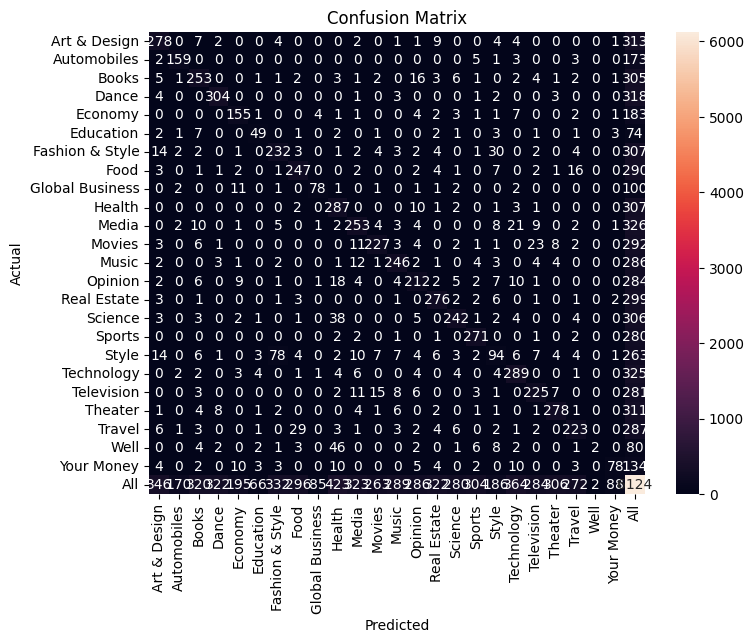

In [30]:
# Visualize the model's performance
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

Examples of Model Classifying the news articles

In [31]:
example_articles = X_test[:5]
actual_labels = y_test[:5]
predicted_labels = nb_classifier.predict(X_test_tfidf[:5])

In [32]:
for article, true_label, predicted_label in zip(example_articles, actual_labels, predicted_labels):
    print("Article:")
    print(article)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print("\n")


Article:
act FORM festival held Arcosanti Arizona Afropunk Huichica Music Festivals Hit Year Woodstock Music Arts Festival turns year helped define music festivals counterculture generation resulting legacy mixed slickly produced multiday affairs unmitigated disasters like Fyre Festival festivals since led increasing number exciting events organized year eight music festivals notable stunning settings extracurricular programming highly curated alternative lineups Marfa Myths collaboration Ballroom Marfa nonprofit cultural arts space record label Mexican Summer Since began four years ago West Texas town internationally recognized art culture Marfa Myths showcased diverse roster talent Expect year acts like Khruangbin Cass McCombs miss art exhibitions around town PRO TIP Bring boots hydrate advises Sarah Melendez Ballroom Marfa program director Booking accommodations meal reservations advance must April Marfa Tex pass tickets available individual shows Everyone creative philosophy FORM h

### Thank you Rihal Team !